# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [17]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:** The smartcab remains still all the time. It isn't programmed to moved at different situations. The situtaions are as follows:-
1. Red Light
2. Green light with no oncoming traffic
3. Green light with oncoming traffic
4. Reaching the destination in time

1 -- At a red light the smart cab should stop hence we get +ve rewards for such situtaions because our smartcab doesn't move at all so it's stationary at red lights

2 -- At a green light with no oncoming traffic it should move in the direction of the destination however our cab is not moving at all so it receives -ve rewards.

3 -- At a green light with oncoming traffic it should remain idle and should move in the direction that avoids collision. However since our smartcab is stationary it receives a small +ve reward

The smartcab also receives -ve rewards/penalized if it reaches after the required time. In our case it will receive -ve reward as it doesn't move. 

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:** 
1. Flags in the agent.py that can be changed are : - 
    * num_dummies :- This will change the number of cars other than the agent car in the grid. Increasing it might create more traffic and decreasing it might decrease the time from source to destination
    * grid_size :- This increase the size of the city thereby increasing the number of intersection points and also the number of traffic lights. This provides with more ways and to reach the destination , thereby reducing traffic and to some extent 
    * alpha :- This is the learning rate of the Model.A higher value of alpha means the agent tries to retain what it has already learnt rather than new things
    * epsilon :- Increasing epsilon actually ensures that there are more random selection of actions in states thus ensuring all posibilities are explored
    * tolerance_value :- training phase will stop after epsilon reaches a threshold which is the epsilon tolerance value.
    
2.The function 'act()' is called when an agent performs an action.

3.The render_text() function is used to display the non GUI simulation of the smartcab , i.e. the one which is displayed on the terminal/Command-Dos window( where we execture the agent.py file ) whereras the render() function displays the simulation in the GUI window that opens up after executing the agent.py file.

4.In the planner.py Python file the 'next_waypoint()'function considers the East-West direction first and then the North-South direction.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


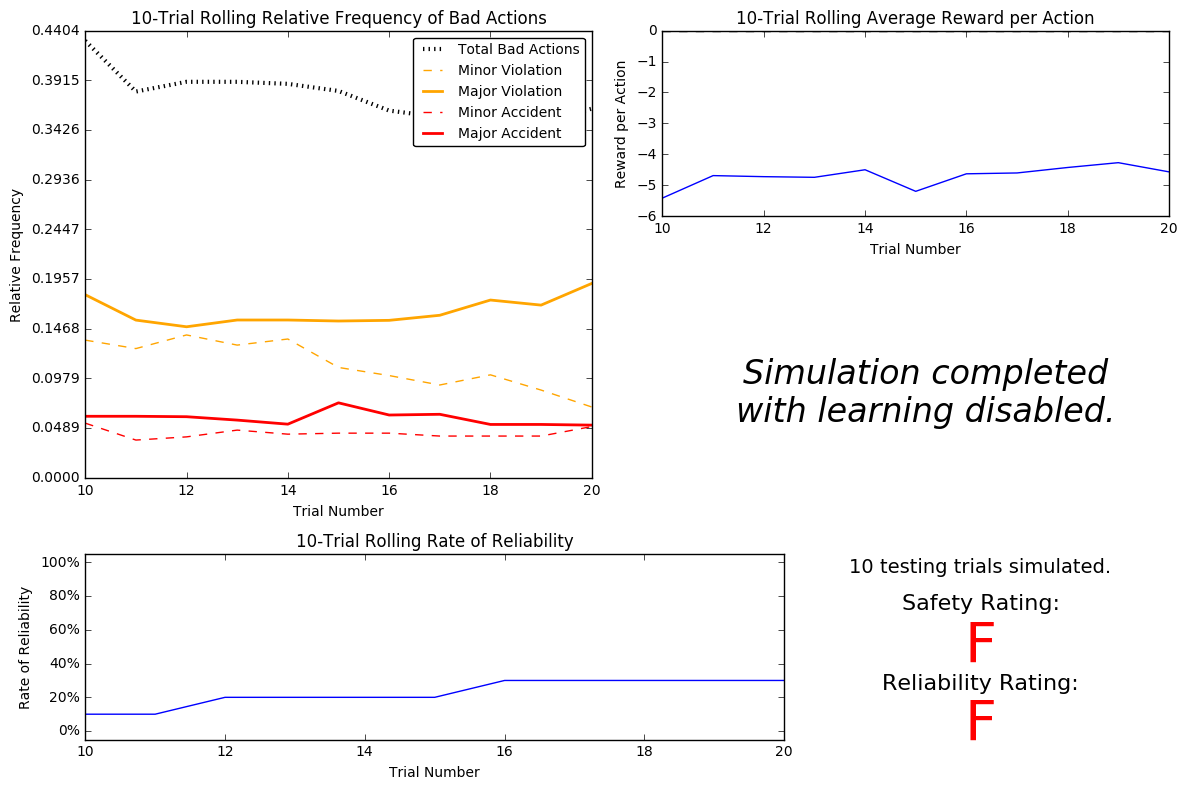

In [19]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**
The driving agent is making bad decisions around 37 % of the time since the graph of frequency of total bad decisions varies between 34.18% and 39.06%. Out of the total time some minor and major accidents are also caused. The rate of accidents major & minor is around 0.8-1% . Since the driver is driving randomly hence it's not paying attention to the violations/traffic/destinations. Hence it might move away from the destination and might never reach it and even on the way drive during red lights or oncoming traffic. Hence the rate of reliability graphis around 0- 20% which is quite low. Most of the rewards the agent receives are negative due to randomized actions and he is being penalized depending on either a violation or an accident, accident being penalized heavily. Moreover from the Reward per action graph it is quite evident that the rewards he receive are -ve and are constantly increasing in their modular value. We can see later on the number of accidents have increased hence the agent is penalized more. Moreover as the number of trials increases the reliability of the smart cab increases and the probability of making errors/-ve rewards decreases . Hence the result does change as number of trails increases. The smart cab is not considered safe as it recieved an F grade in both reliability and safety of the passenger. Hence it can in no circumstance be used in the real world. We can't say much about number of trials since it's purely random and will change always

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:** The important features for the smartcab are :-
*  **Waypoint** :- This tells the smartcab which direction to turn to reach the destination considering the fact where the smartcab is heading right now. Without this feature it's impossible to know the destination and move our smartcab accordingly.


*  **Light** :- The color of light signifies whether to stop at a crossing or to move at a crossing. If not taken into consideration it might lead to traffic violation thereby reducing safety and reliability.

*  **Left** :- The intended direction of travel for a vehicle to the Smartcab's left. Returns None if no vehicle is present.
*  **Oncoming** :- The intended direction of travel for a vehicle across the intersection from the Smartcab. Returns None if no vehicle is present.

The above actually tell us whether the oncoming/left car's intended paths. This might be useful because every country has different Traffic laws an depending on them this will effect the agent as in certain cirucmstances he has to stop to follow the particular Traffic law ( such as allowing Cars on left to move first etc. ) and avoid further violation/accidents. Depending on country to country some of the above 3 features might NOT BE NEEDED thereby reducing the state space.Due to the Right of way we won't be needing the direction in which the car to the right goes.
As for deadline , it's not much of a help since if we include deadline it will increase the state space by a huge amount and it's just not that much helpful in determining the next action , because in each step our smartcab is bound to move closer , so deadline would not be helping

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:** As mentioned in the Udacity's question and after observing the driving rules it seems only from the inputs the oncoming is required and right is longer needed. The features selected for the final state space are Waypoint , Light , Oncoming & Left. The size of state space is 2( For lights ) x 3( For waypoint ) x 4( For Oncoming ) x 4 ( for left). Hence the size of state space is 144. Yes due to the given size of grid being small it's possible to learn about all states within a reasonable number of trials. Selecting deadline as a input too will increase the state space a lot since it's a variable number and can range from 1 - infinity ( express a large value) thereby infinite possibilities are created. Since US right of way applies hence we won't be needing the 'RIGHT' input from the given inputs. 

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

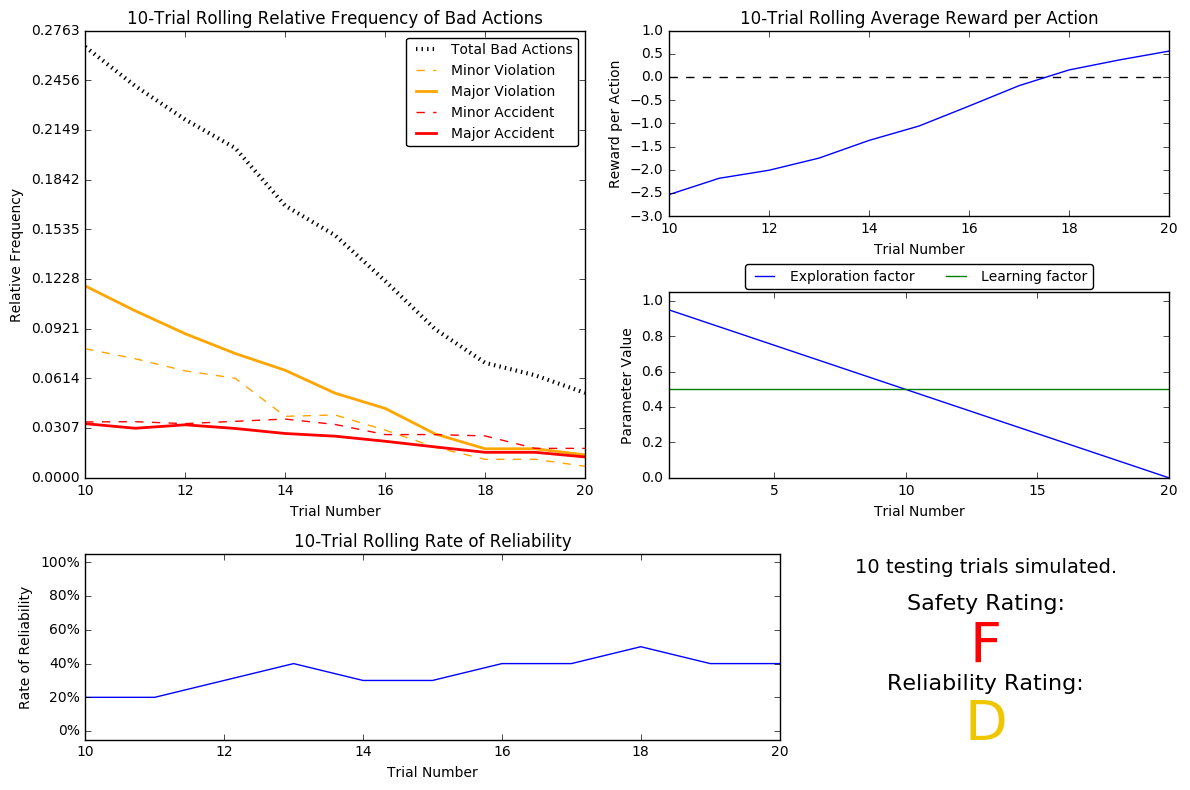

In [22]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**
The Safety rating is still F although the reliability has improved and the agent achieved D grade. Just like previous one as the number of trials increase the rate of reliability increases. This characteristic is similar to the basic driving agent and default Q-Learning agent. Approximately 30-40 training trials were performed by the driving agent before the testing began. Yes it can be easily calculated because as the epsilon value goes below epsilon tolerance it stops training. Moreover the epsilon is making an AP so the number of training trials can be calculated. Yes the decaying function was accurately represented in the parameters panel. The increasing number of trials decresed the number of bad actions and also increased the average reward and reliability. The safety and reliability is a little better than the initial driving agent , however due to the low number of training trials of the agent & the value of epsilon/alpha could have made a better agent , thus receiving better ratings. It is evident from the fact the average reward increases with number of trails so do the reliability.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

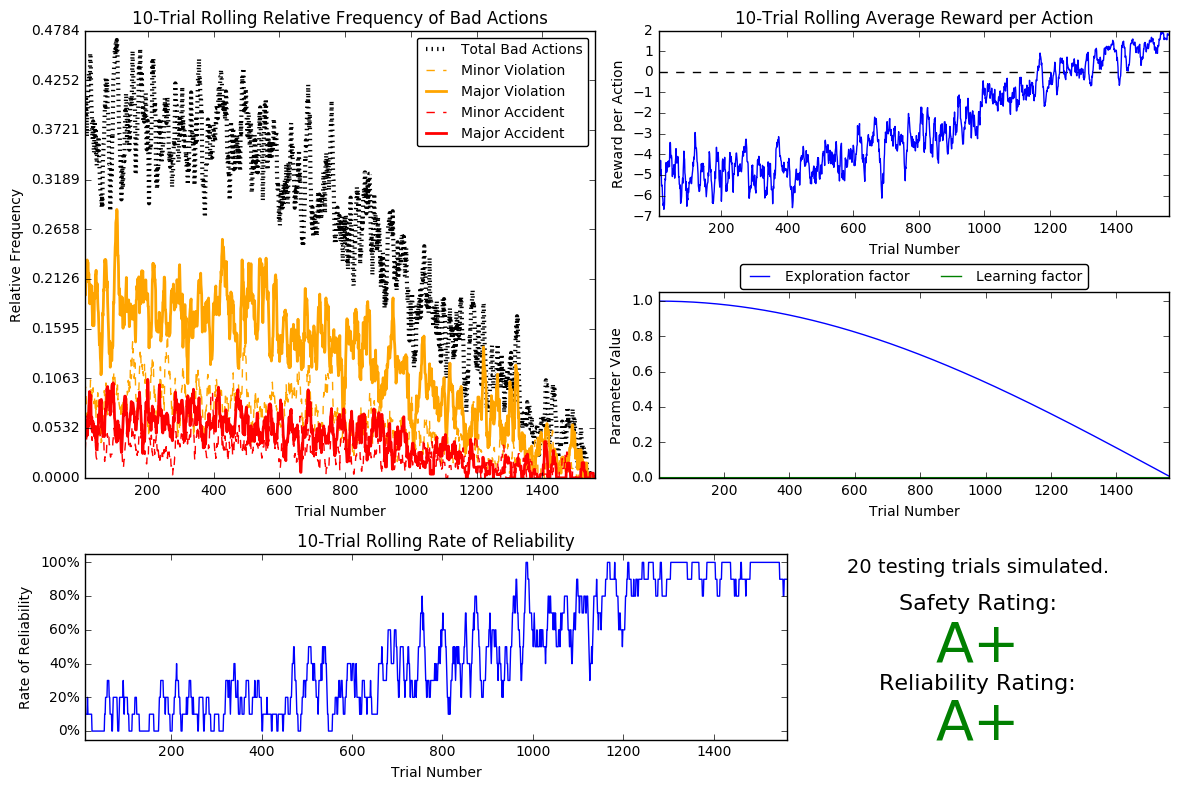

In [35]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

##### **Answer:** 
The decaying functions used was epsilon = e^(-a*t)
To get the required rating I used alpha = 0.001. This must have used almost 1500 training trials before it began testing the 20 trials.
Epsilon tolerance used was 0.01 and alpha used was 0.001. I used such a small alpha because my Realiability rating was coming to be quite low so to improve my learning rate and better learn about the dependence of reliability on different states I decreased alpha and tolerance rate to improve my score and allow the agent to explore more possibilities.
The improvement made was quite drastic which is evident from the Safety and Realiability Rating obtained in both the above graphs.
Yes the Q-Learner results show that my driving agent has not perfectly but close to perfection learned an appropriate policies. This was tested by increasing the number of test_trials and the model performed quite well, which is enough of a proof to evaluate it.
Yes I am satisfied with the smart cab ratings since a smartcab should reach almost in time without avoiding any violations/accidents , in these terms our smartcab has achieved a nice success rate. This is evident from setting testing_trials to 100 and the ratings obtained.
It's not perfect as seen later on it still receives negative rewards so it seems that it still breaks some rules , however that can be improved in future by training our smartcab more. It's quite difficult to achieve 100% success rate.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** According to me the following would be an optimal policy :- 
* Whenever the light is red , always stop if the agent wants to go forward or left.
* Whenever the light is red , check if there is no car coming from left and going right , if no then using right of way one can move right.
* Whenever the light is green check the direction the agent has to go. If it's forward move only when there is no oncoming traffic in its path.
* When the light is green if agent has to go left ,similarly like above he observes the oncoming cars and moves when there is none. However it can turn right without looking at any traffic due to Right-Of-Way.

I would consider the policy generate by the Q-Learning as sub-optimal policy as one of the examples I observed where it kind of behaves badly is
('right', 'red', ('oncoming', None), ('left', None))
 -- forward : -3.53
 -- right : 0.46
 -- None : 0.96
 -- left : -3.40
 
 Ideally it should move right however the reward is maximum for the case where the car stops and according to Right of Way it should be moving right , considering oncoming and cars on left are stationary/empty lanes hence the right action should the one with the maximum reward, which is not so in this case. Many more examples where the light is green , show that this policy is not optimal but a sub-optimal policy. Example such as following show its following optimal policy
 
 ('forward', 'red', ('oncoming', None), ('left', 'left'))
 -- forward : -0.91
 -- right : 0.05
 -- None : 0.33
 -- left : -0.94

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:** Ofcourse if we train more and more , we are prone to the curse of overfitting. And it might be that the smartcab instead of learning the actual rules will overfit to the data given.

As for future rewards , since if we give future rewards to the goal this might force the driving agent to intentionally break the traffic rules/safety parameters to reach a large +ve reward in the end/goal in time. Moreover since we always know we are moving closer hence we need not be sure about whether the immediate rewards we receive are enough or not. Future rewards will decrease the safety and also are not necessary in this case, since a smartcab's every moment is judged and rewarded accordingly hence only immediate rewards are necessary. The set of actions/state might be similar if the agent is 5 blocks away or 1 block away from the destination , hence the future reward won't be impacting much on the agent. Since in each step it always MOVES CLOSER to the destination.

Moreover since we cannot determine the distance at anypoint of the cab from the destination since states are not linked to specific intersections. To avoid this we can propogate rewards to those states close to destination. However every time the destination is random , so we will have to propogate rewards to almost all the states in the grid. So it will be meaningless and won't be feasible.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.